In [80]:
import pandas as pd 
import numpy as np 
import random as rnd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [81]:
df_train = pd.read_csv('C:/Users/meeth/Desktop/Datasets/titanic/train.csv')
df_test = pd.read_csv('C:/Users/meeth/Desktop/Datasets/titanic/test.csv')
combine=[df_train , df_test]

# Feature analysis

In [82]:
df_train.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## feature data types
### categorical - survived, sex, embarked 
### ordinal - Pclass
### discrete - SibSp, Parch
### continous - Age, Fare

In [84]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [85]:
df_train.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [86]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### train dataset has NAs in Age-177,cabin-687,embarked-2
### test data has NAs in Age-86, cabin-327

#### as cabin,names and ticket is not giving much insight and it will not be usefull for pridicting model we are droping that feature. 


In [87]:
df_train = df_train.drop(['Name' ,'Cabin' ,'Ticket'], axis=1)

In [88]:
df_test = df_test.drop(['Name' ,'Cabin' ,'Ticket'], axis=1)

In [89]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [90]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [91]:
df_train['Family'] = df_train['SibSp'] + df_train['Parch']
df_test['Family'] = df_test['SibSp'] + df_test['Parch']

In [92]:
df_train.head(15)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,1,0,3,male,22.0,1,0,7.2500,S,1
1,2,1,1,female,38.0,1,0,71.2833,C,1
2,3,1,3,female,26.0,0,0,7.9250,S,0
3,4,1,1,female,35.0,1,0,53.1000,S,1
4,5,0,3,male,35.0,0,0,8.0500,S,0
5,6,0,3,male,NaN,0,0,8.4583,Q,0
6,7,0,1,male,54.0,0,0,51.8625,S,0
7,8,0,3,male,2.0,3,1,21.0750,S,4
8,9,1,3,female,27.0,0,2,11.1333,S,2
9,10,1,2,female,14.0,1,0,30.0708,C,1


In [93]:
df_test.head(15)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,892,3,male,34.5,0,0,7.8292,Q,0
1,893,3,female,47.0,1,0,7.0000,S,1
2,894,2,male,62.0,0,0,9.6875,Q,0
3,895,3,male,27.0,0,0,8.6625,S,0
4,896,3,female,22.0,1,1,12.2875,S,2
5,897,3,male,14.0,0,0,9.2250,S,0
6,898,3,female,30.0,0,0,7.6292,Q,0
7,899,2,male,26.0,1,1,29.0000,S,2
8,900,3,female,18.0,0,0,7.2292,C,0
9,901,3,male,21.0,2,0,24.1500,S,2


#### added new feature family that a dum of SibSp and Parch.
#### now we can drop SibSp and Parch

In [94]:
df_train = df_train.drop(['SibSp' ,'Parch'],axis=1)
df_test = df_test.drop(['SibSp' ,'Parch'],axis=1)

In [95]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,1,0,3,male,22.0,7.2500,S,1
1,2,1,1,female,38.0,71.2833,C,1
2,3,1,3,female,26.0,7.9250,S,0
3,4,1,1,female,35.0,53.1000,S,1
4,5,0,3,male,35.0,8.0500,S,0


In [96]:
df_test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Family
0,892,3,male,34.5,7.8292,Q,0
1,893,3,female,47.0,7.0000,S,1
2,894,2,male,62.0,9.6875,Q,0
3,895,3,male,27.0,8.6625,S,0
4,896,3,female,22.0,12.2875,S,2


In [97]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,1,0,3,male,22.0,7.2500,S,1
1,2,1,1,female,38.0,71.2833,C,1
2,3,1,3,female,26.0,7.9250,S,0
3,4,1,1,female,35.0,53.1000,S,1
4,5,0,3,male,35.0,8.0500,S,0


#### Now we will convert male and female string data into numarical values (female = 1 and male = 0)

In [98]:
df_train.Sex[df_train.Sex == 'female'] = 1
df_train.Sex[df_train.Sex == 'male'] = 0

<ipython-input-98-e01ebf44d2cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.Sex[df_train.Sex == 'female'] = 1
<ipython-input-98-e01ebf44d2cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.Sex[df_train.Sex == 'male'] = 0


In [99]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,1,0,3,0,22.0,7.2500,S,1
1,2,1,1,1,38.0,71.2833,C,1
2,3,1,3,1,26.0,7.9250,S,0
3,4,1,1,1,35.0,53.1000,S,1
4,5,0,3,0,35.0,8.0500,S,0


In [100]:
df_test.Sex[df_test.Sex == 'female'] = 1
df_test.Sex[df_test.Sex == 'male'] = 0

<ipython-input-100-b4baa441b3d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.Sex[df_test.Sex == 'female'] = 1
<ipython-input-100-b4baa441b3d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.Sex[df_test.Sex == 'male'] = 0


In [101]:
df_test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Family
0,892,3,0,34.5,7.8292,Q,0
1,893,3,1,47.0,7.0000,S,1
2,894,2,0,62.0,9.6875,Q,0
3,895,3,0,27.0,8.6625,S,0
4,896,3,1,22.0,12.2875,S,2


In [102]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   Fare         891 non-null    float64
 6   Embarked     889 non-null    object 
 7   Family       891 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


#### converting Sex dtype to bool

In [103]:
df_train['Sex'] = df_train['Sex'].astype(int)

In [104]:
df_test['Sex'] = df_test['Sex'].astype(int)

In [105]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int32  
 3   Age          332 non-null    float64
 4   Fare         417 non-null    float64
 5   Embarked     418 non-null    object 
 6   Family       418 non-null    int64  
dtypes: float64(2), int32(1), int64(3), object(1)
memory usage: 21.4+ KB


#### Embarked has three values C = Cherbourg, Q = Queenstown, S = Southampton, now we will convert this to numerical data as(C = 0 , Q = 1 , S = 2).

In [106]:
df_train.Embarked[df_train.Embarked == 'C'] = 0
df_train.Embarked[df_train.Embarked == 'Q'] = 1
df_train.Embarked[df_train.Embarked == 'S'] = 2

<ipython-input-106-6770d7ce022a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.Embarked[df_train.Embarked == 'C'] = 0
<ipython-input-106-6770d7ce022a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.Embarked[df_train.Embarked == 'Q'] = 1
<ipython-input-106-6770d7ce022a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.Embarked[df_train.Embarked == 'S'] = 2


In [107]:
df_test.Embarked[df_test.Embarked == 'C'] = 0
df_test.Embarked[df_test.Embarked == 'Q'] = 1
df_test.Embarked[df_test.Embarked == 'S'] = 2

<ipython-input-107-7411f45a3229>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.Embarked[df_test.Embarked == 'C'] = 0
<ipython-input-107-7411f45a3229>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.Embarked[df_test.Embarked == 'Q'] = 1
<ipython-input-107-7411f45a3229>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.Embarked[df_test.Embarked == 'S'] = 2


In [108]:
df_train['Embarked'] = df_train['Embarked'].astype(float)

In [109]:
df_test['Embarked'] = df_test['Embarked'].astype(float)

#### creating categorical feautre from Family data to know is the passenger was travelling alon or with family. (1-yes,0-No)

In [110]:
df_train['Alone'] = 0

In [111]:
df_train.Alone[df_train.Family >= 1] = 1

<ipython-input-111-c5f094d28e9a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.Alone[df_train.Family >= 1] = 1


In [112]:
df_train.head(15)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Alone
0,1,0,3,0,22.0,7.2500,2.0,1,1
1,2,1,1,1,38.0,71.2833,0.0,1,1
2,3,1,3,1,26.0,7.9250,2.0,0,0
3,4,1,1,1,35.0,53.1000,2.0,1,1
4,5,0,3,0,35.0,8.0500,2.0,0,0
5,6,0,3,0,NaN,8.4583,1.0,0,0
6,7,0,1,0,54.0,51.8625,2.0,0,0
7,8,0,3,0,2.0,21.0750,2.0,4,1
8,9,1,3,1,27.0,11.1333,2.0,2,1
9,10,1,2,1,14.0,30.0708,0.0,1,1


In [113]:
df_test['Alone'] = 0

In [114]:
df_test.Alone[df_test.Family >= 1] = 1

<ipython-input-114-7f922a201052>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.Alone[df_test.Family >= 1] = 1


In [115]:
df_test.head(15)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Family,Alone
0,892,3,0,34.5,7.8292,1.0,0,0
1,893,3,1,47.0,7.0000,2.0,1,1
2,894,2,0,62.0,9.6875,1.0,0,0
3,895,3,0,27.0,8.6625,2.0,0,0
4,896,3,1,22.0,12.2875,2.0,2,1
5,897,3,0,14.0,9.2250,2.0,0,0
6,898,3,1,30.0,7.6292,1.0,0,0
7,899,2,0,26.0,29.0000,2.0,2,1
8,900,3,1,18.0,7.2292,0.0,0,0
9,901,3,0,21.0,24.1500,2.0,2,1


In [116]:
df_train = df_train.drop(['Family'] ,axis=1)
df_test = df_test.drop(['Family'],axis=1)

In [117]:
df_test['Embarked'] = df_test['Embarked'].astype(int)

In [118]:
x = df_train[['Embarked' ,'PassengerId']].groupby(by=['Embarked'] ,as_index=False).count()

In [119]:
print(x)

   Embarked  PassengerId
0       0.0          168
1       1.0           77
2       2.0          644


#### most of the passengers are boarded from (Southampton = 2) so we will fill NAs with "2".

In [120]:
df_train['Embarked'].fillna(value = 2 , inplace=True)

In [121]:
df_train['Embarked'] = df_train['Embarked'].astype(int)

In [122]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          714 non-null    float64
 5   Fare         891 non-null    float64
 6   Embarked     891 non-null    int32  
 7   Alone        891 non-null    int64  
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.9 KB


In [123]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int32  
 3   Age          332 non-null    float64
 4   Fare         417 non-null    float64
 5   Embarked     418 non-null    int32  
 6   Alone        418 non-null    int64  
dtypes: float64(2), int32(2), int64(3)
memory usage: 19.7 KB


In [124]:
#### filling Age Null values with range of 15 to 43 as Age data set has mean 23 and standard deviation of 14. 

In [125]:
df_train['Age'] = df_train['Age'].fillna(rnd.randint(15,43))

In [126]:
df_test["Age"] = df_test['Age'].fillna(rnd.randint(14,43))

 ### analysing data after doing feature engineering


In [127]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Alone
0,1,0,3,0,22.0,7.2500,2,1
1,2,1,1,1,38.0,71.2833,0,1
2,3,1,3,1,26.0,7.9250,2,0
3,4,1,1,1,35.0,53.1000,2,1
4,5,0,3,0,35.0,8.0500,2,0


In [128]:
gndSur = df_train[['Sex' ,'Survived']].groupby(['Sex'], as_index=False).sum()

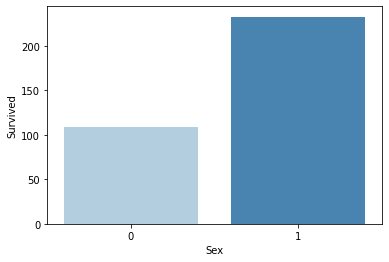

In [129]:

sns.barplot(x='Sex', y='Survived', palette = "Blues" ,data=gndSur)
plt.show()

In [130]:
pclassSur = df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=False).sum().sort_values(by='Survived', ascending=False)
pclassSur.head()

,Pclass,Survived
0,1,136
2,3,119
1,2,87


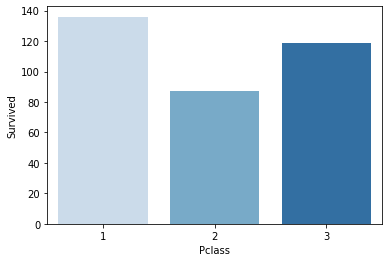

In [131]:
sns.barplot(y='Survived' ,x='Pclass', palette = "Blues", data=pclassSur)
plt.show()

In [132]:
portboardSur = df_train[['Embarked' ,'Survived']].groupby(['Embarked'] ,as_index=False).sum().sort_values(by='Survived' ,ascending=False)
portboardSur

,Embarked,Survived
2,2,219
0,0,93
1,1,30


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

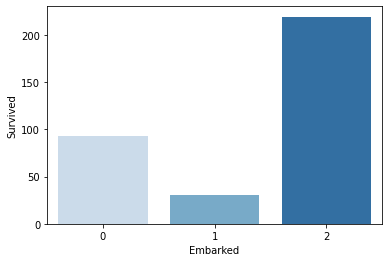

In [133]:
sns.barplot(x='Embarked',y='Survived',palette = "Blues" ,data=portboardSur)

In [134]:
aloneSur = df_train[['Alone' ,'Survived']].groupby(['Alone'],as_index=False).sum().sort_values(by='Survived' ,ascending=False)
aloneSur

,Alone,Survived
1,1,179
0,0,163


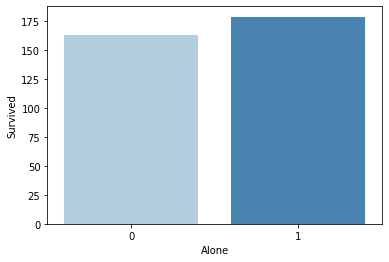

In [135]:
sns.barplot(x='Alone',y='Survived',palette='Blues' ,data=aloneSur)
plt.show()

In [136]:
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].median())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int32  
 3   Age          332 non-null    float64
 4   Fare         418 non-null    float64
 5   Embarked     418 non-null    int32  
 6   Alone        418 non-null    int64  
dtypes: float64(2), int32(2), int64(3)
memory usage: 19.7 KB


C:\Users\meeth\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

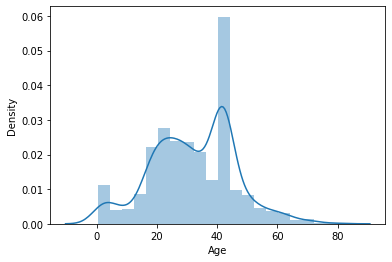

In [137]:
sns.distplot(df_train["Age"])

In [138]:
df_train.describe()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Alone
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,32.142727,32.204208,1.536476,0.397306
std,257.353842,0.486592,0.836071,0.477990,13.898446,49.693429,0.791503,0.489615
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,7.910400,1.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,32.000000,14.454200,2.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,42.000000,31.000000,2.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,512.329200,2.000000,1.000000


C:\Users\meeth\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

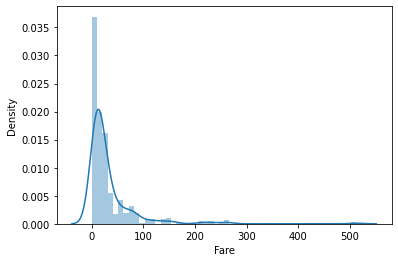

In [139]:
sns.distplot(df_train["Fare"])

<AxesSubplot:>

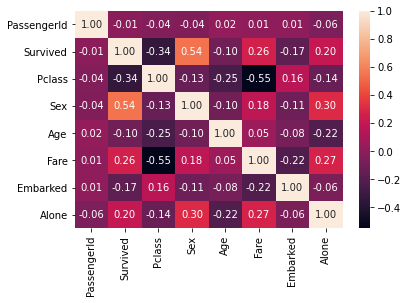

In [149]:
sns.heatmap(df_train.corr(),annot=True, fmt = ".2f")

## Model Bulding